In [45]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calculate_log as callog
%matplotlib inline

In [53]:
class opt:
    outf = 'extracted_features'
    backbone_name = 'simclr'
    dataset ='cifar10'
    fet = ''
    fet2 = 'original'

In [54]:
ood_dataset=['svhn','lsun_fix','imagenet_fix','lsun_resize','imagenet_resize'] 
# ood_dataset = ['cifa r10']
out_dataset=ood_dataset
num_out_datasets = len(ood_dataset)

In [55]:
ind_dataset='cifar10'
experiment = opt.backbone_name
ae_type = 'vanilla_AE'
prefix = 'confidence' #confidence

layer_num=9
epoch=500
ind=[]
ind_train=[]
ood=dict()
for i in range(layer_num):
    ood[i]=[]
    ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    for j in range(len(ood_dataset)):
        ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet))))

# ind_MD = np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_in_{}_original_single.npy'.format(ind_dataset)))[:,:-1]
# ood_MD=[]
# for j in range(len(ood_dataset)):
#     ood_MD.append(np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_out_{}_original_single.npy'.format(ood_dataset[j])))[:,:-1])

In [56]:
train_ind_feature=dict()
test_ind_feature=dict()
test_ood_feature=dict()
num_ood=dict()

for i in range(layer_num):
    test_ood_feature[i]=[]
    num_ood[i]=[]
    train_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+'_'+opt.fet2+'_train_ind.npy'))
    test_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+'_'+opt.fet2+'_test_ind.npy'))
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_feature[i].append(np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+out_dataset[j]+'_'+opt.fet2+'_test_ood.npy')))
        num_ood[i].append(test_ood_feature[i][j].shape[0])
train_data_ind = train_ind_feature
test_data_ind = test_ind_feature
test_data_ood = test_ood_feature
for i in range(layer_num):
    print(train_data_ind[i].shape)

5
5
5
5
5
5
5
5
5
(50000, 64)
(50000, 64)
(50000, 64)
(50000, 128)
(50000, 128)
(50000, 256)
(50000, 256)
(50000, 512)
(50000, 512)


In [59]:
train_ind_norm=dict()
test_ind_norm=dict()
test_ood_norm=dict()

for i in range(layer_num):
    layer=i
#     layer=layer_num-1
    test_ood_norm[i]=[]
    num_ood[i]=[]
    train_ind_norm[i]=np.linalg.norm(train_ind_feature[layer],axis=1)
    test_ind_norm[i]=np.linalg.norm(test_ind_feature[layer],axis=1)
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_norm[i].append(np.linalg.norm(test_ood_feature[layer][j],axis=1))


# norm_train_ind = train_ind_feature[13].norm(axis=1)

5
5
5
5
5
5
5
5
5


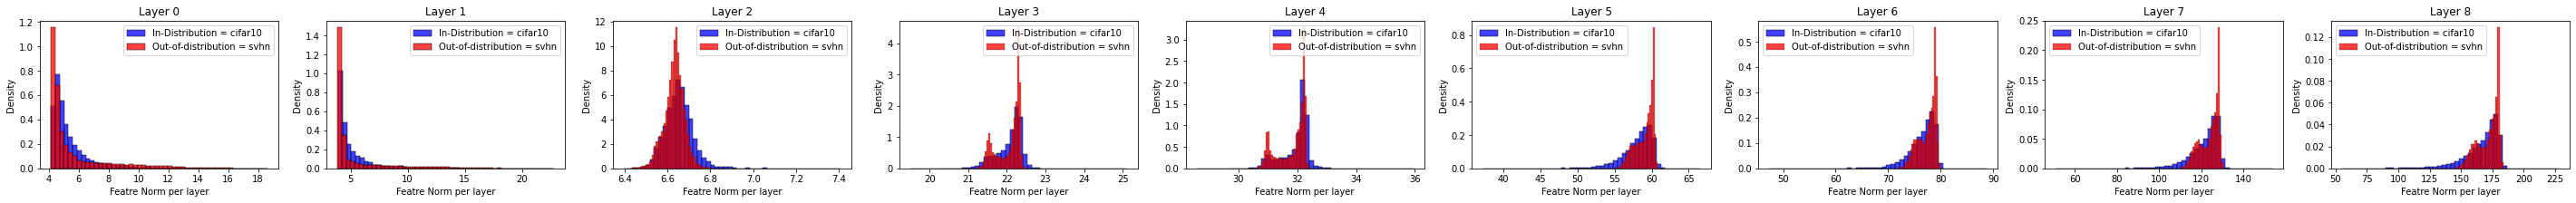

In [60]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    sns.histplot(ax=axs[layer],data=test_ind_norm[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=test_ood_norm[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Featre Norm per layer')

In [61]:
# from sklearn.preprocessing import StandardScaler
# ind_norm_scaled=[]
# train_ind_norm_scaled=[]
# ood_norm_scaled=dict()
# for j in range(len(ood_dataset)):
#     ood_norm_scaled[j]=[]

# for i in range(layer_num):
#     scaler=StandardScaler()
#     scaler.fit(train_ind_norm[i].reshape(-1,1))
#     train_ind_norm_scaled.append(scaler.transform(train_ind_norm[i].reshape(-1,1)).reshape(-1))
#     ind_norm_scaled.append(scaler.transform(test_ind_norm[i].reshape(-1,1)).reshape(-1))
#     for j in range(len(ood_dataset)):
#         ood_norm_scaled[j].append(scaler.transform(test_ood_norm[i][j].reshape(-1,1)).reshape(-1))

In [62]:
# ind_norm_scaled_max=np.min(ind_norm_scaled,0)
# train_ind_norm_scaled_max = np.min(train_ind_norm_scaled,0)
# ood_norm_scaled_max=[]
# for j in range(len(ood_dataset)):
#     ood_norm_scaled_max.append(np.min(ood_norm_scaled[j],0))

In [63]:
# ood_num=1
# sns.histplot(ind_norm_scaled_max,color='blue')
# sns.histplot(ood_norm_scaled_max[ood_num],color='red')
# plt.legend(['CIFAR10',out_dataset[ood_num]])
# plt.title('Max-Scaled Feature Norm')
# plt.xlabel('Feature Norm')

In [64]:
# ind_norm_scaled_max_exp=np.exp(ind_norm_scaled_max)
# train_ind_norm_scaled_max_exp= np.exp(train_ind_norm_scaled_max)
# ood_norm_scaled_max_exp=[]
# for j in range(len(ood_dataset)):
#     ood_norm_scaled_max_exp.append(np.exp(ood_norm_scaled_max[j]))

In [65]:
# ood_num=1
# sns.histplot(ind_norm_scaled_max_exp,color='blue')
# sns.histplot(ood_norm_scaled_max_exp[ood_num],color='red')
# plt.legend(['CIFAR10',out_dataset[ood_num]])
# plt.title('Max-Scaled Feature Norm, encoder = MoCo ver2')
# plt.xlabel('Feature Norm')

In [66]:
# ind_revised=[]
# ind_train_revised=[]
# ood_revised=dict()

# for i in range(layer_num):
#     ood_revised[i]=[]
#     ind_revised.append(ind[i]/ind_norm_scaled_max_exp)
#     ind_train_revised.append(ind_train[i]/train_ind_norm_scaled_max_exp)
#     for j in range(len(ood_dataset)):
#         ood_revised[i].append(ood[i][j]/ood_norm_scaled_max_exp[j])

In [67]:
ind_revised=[]
ind_train_revised=[]
ood_revised=dict()

for i in range(layer_num):
    ood_revised[i]=[]
    ind_revised.append(ind[i]/(test_ind_norm[i]+1e-6))
    ind_train_revised.append(ind_train[i]/(train_ind_norm[i]+1e-6))
    for j in range(len(ood_dataset)):
        ood_revised[i].append(ood[i][j]/(test_ood_norm[i][j]+1e-6))

In [68]:
# layer=2
# sns.histplot(test_ind_norm[layer],color='blue')
# sns.histplot(test_ood_norm[layer][0],color='red')
# plt.legend(['CIFAR10','SVHN'])
# plt.title('Extracted from Layer 2, encoder = MoCo ver2')
# plt.xlabel('Feature Norm')

{0: {'TMP': {'TNR': 0.029924708051628723, 'AUROC': 0.4604844537492317, 'DTACC': 0.5000731714812539, 'AUIN': 0.2570990744756278, 'AUOUT': 0.6921503349539989}}}

{0: {'TMP': {'TNR': 0.029924708051628723, 'AUROC': 0.4604844537492317, 'DTACC': 0.5000731714812539, 'AUIN': 0.2570990744756278, 'AUOUT': 0.6921503349539989}}, 1: {'TMP': {'TNR': 0.06634142593730796, 'AUROC': 0.4498774854025814, 'DTACC': 0.5133207437000615, 'AUIN': 0.2630750350985145, 'AUOUT': 0.7091119417352476}}}

{0: {'TMP': {'TNR': 0.029924708051628723, 'AUROC': 0.4604844537492317, 'DTACC': 0.5000731714812539, 'AUIN': 0.2570990744756278, 'AUOUT': 0.6921503349539989}}, 1: {'TMP': {'TNR': 0.06634142593730796, 'AUROC': 0.4498774854025814, 'DTACC': 0.5133207437000615, 'AUIN': 0.2630750350985145, 'AUOUT': 0.7091119417352476}}, 2: {'TMP': {'TNR': 0.058389674247080525, 'AUROC': 0.4615649354640443, 'DTACC': 0.5176559311616472, 'AUIN': 0.2747341287243939, 'AUOUT': 0.7049830426362202}}}

{0: {'TMP': {'TNR': 0.029924708051628723, 'AUROC

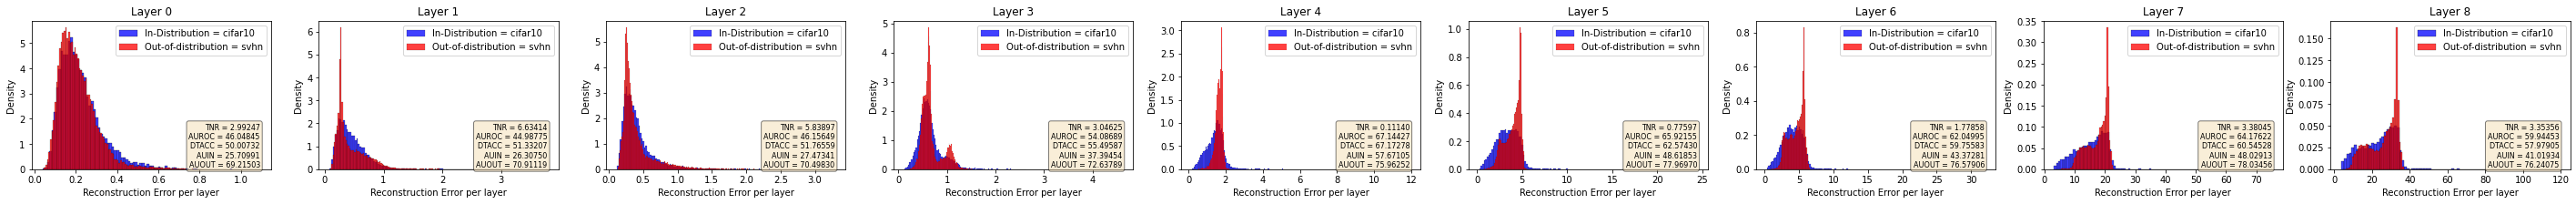

In [70]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    print(results)
    print('')
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind[layer]),np.max(-ood[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)



{'TMP': {'TNR': 0.56299938537185, 'AUROC': 0.9198577481561155, 'DTACC': 0.8456527350952674, 'AUIN': 0.8642453584034788, 'AUOUT': 0.9593231617620592}}
{'TMP': {'TNR': 0.4962738168408113, 'AUROC': 0.9080612822679778, 'DTACC': 0.8357445605408728, 'AUIN': 0.8504129517710561, 'AUOUT': 0.9495129175675359}}
{'TMP': {'TNR': 0.5412953288260602, 'AUROC': 0.9161588890596188, 'DTACC': 0.8437908420405654, 'AUIN': 0.8606777393379207, 'AUOUT': 0.9550652122549708}}
{'TMP': {'TNR': 0.7551859250153657, 'AUROC': 0.956966856177013, 'DTACC': 0.8901763368162262, 'AUIN': 0.9212070164137376, 'AUOUT': 0.9800493675623472}}
{'TMP': {'TNR': 0.7910264290104487, 'AUROC': 0.9626298248309771, 'DTACC': 0.8979583589428396, 'AUIN': 0.9300741267380361, 'AUOUT': 0.983034689376949}}
{'TMP': {'TNR': 0.8308236017209588, 'AUROC': 0.9688897472341734, 'DTACC': 0.9072391210817455, 'AUIN': 0.9396727682005905, 'AUOUT': 0.9863628366562168}}
{'TMP': {'TNR': 0.8255224339274738, 'AUROC': 0.9697258297480025, 'DTACC': 0.907848832206515,

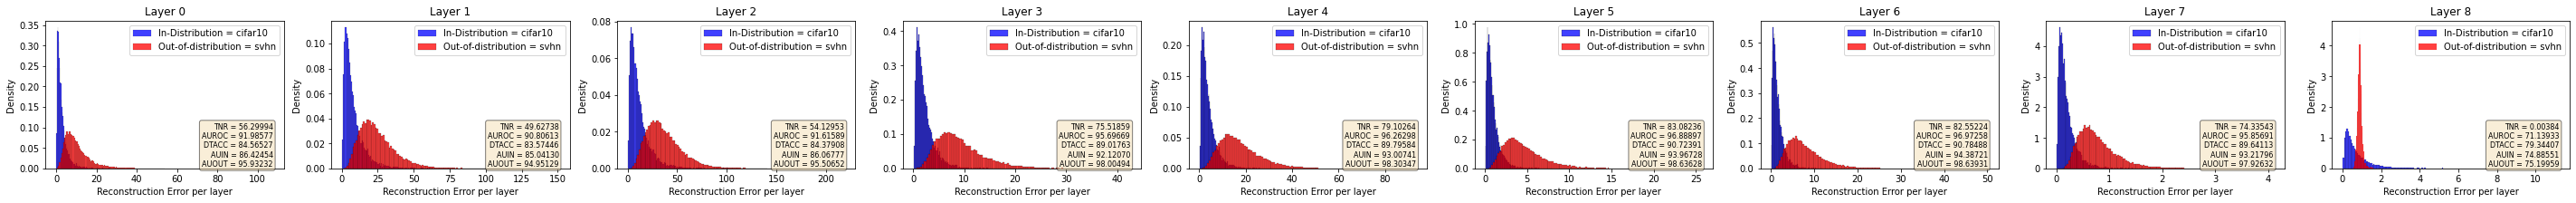

In [35]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind_revised[layer],ood_revised[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=-ind_revised[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood_revised[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind_revised[layer]),np.max(-ood_revised[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)




In [36]:
# ind_scaled_mul = ind_revised[0]*ind_revised[1]*ind_revised[2]*ind_revised[3]*ind_revised[4]*ind_revised[5]*ind_revised[6]*ind_revised[7]*ind_revised[8]
# ood_scaled_mul = []
# for j in range(len(ood_dataset)):
#     ood_scaled_mul.append(ood_revised[0][j]*ood_revised[1][j]*ood_revised[2][j]*ood_revised[3][j]*ood_revised[4][j]*ood_revised[5][j]*ood_revised[6][j]*ood_revised[7][j]*ood_revised[8][j])

In [37]:
# ood_index= 2
# print(ood_dataset[ood_index])
# results_max,_,_ = callog.metric(ind_scaled_mul,ood_scaled_mul[ood_index])
# print(results_max)
# sns.histplot(data=-ind_scaled_mul,color='blue',stat='density')
# sns.histplot(data=-ood_scaled_mul[ood_index],color='red',stat='density')
# plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# plt.title('Multipled Anomaly')
# plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_mul),np.max(-ood_scaled_mul[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [38]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train_revised[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind_revised[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood_revised[i][j].reshape(-1,1)).reshape(-1))

In [39]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

lsun_fix
{'TMP': {'TNR': 0.6185, 'AUROC': 0.9355331100000001, 'DTACC': 0.8687, 'AUIN': 0.9458090754312032, 'AUOUT': 0.9185113625765613}}
61.85 / 93.55 / 86.87


Text(37.32209566187213, 0, 'TNR = 61.85000\nAUROC = 93.55331\nDTACC = 86.87000\nAUIN = 94.58091\nAUOUT = 91.85114')

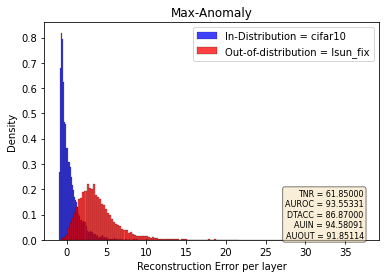

In [40]:
ood_index= 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

rst = results_max['TMP']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)